In [1]:
import pandas as pd
# pd.set_option('display.max_rows', 100)
pd.set_option("display.width",120)
import numpy as np
from os.path import basename
from os.path import join
from os import listdir
from glob import glob
import h5py

from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
from plotnine import *
from IPython.display import display, Markdown

import sys
sys.path.insert(0, '../CODE/')
from importlib import reload
import visualization_utils
reload(visualization_utils)
from visualization_utils import *

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 1

Matplotlib is building the font cache; this may take a moment.


# Yeast

## Permutations

In [2]:
yeast_dict = {
    'permutations': {
        "CallingCards": "../OUTPUT/Yeast_CallingCards_ZEV/permutations/",
        "ChIPexo": "../OUTPUT/Yeast_chipexo_ZEV/permutations/"
    },
    'experiments': {
        "CallingCards": "../OUTPUT/Yeast_CallingCards_ZEV/all_feats/",
        "ChIPexo": "../OUTPUT/Yeast_chipexo_ZEV/all_feats/"
    },
    'tf_names': {
        "CallingCards":"../RESOURCES/Yeast/Yeast_CallingCards_TFs.txt",
        "ChIPexo":"../RESOURCES/Yeast/Yeast_ChIPexo_TFs.txt"
    },
    'binding_baseline': {
        "CallingCards":"../OUTPUT/Yeast_CallingCards_ZEV/bindingonly/",
        "ChIPexo":"../OUTPUT/Yeast_chipexo_ZEV/bindingonly/",
    },
    "organism": "yeast"
}
yeast_sys2com_dict_path = '../RESOURCES/Yeast/orf_name_conversion.tab'

In [3]:
yeast_sys2com_dict = {
    x: y for x, y in np.loadtxt(yeast_sys2com_dict_path, dtype='str')
}

In [4]:
full_stats_dfs, summary_dfs, random_chance_dfs, binding_baseline_dfs, _, _ = process_results(yeast_dict)

Permutations:
### CallingCards
	Number of runs: 35
	Number of TFs: 14
### ChIPexo
	Number of runs: 35
	Number of TFs: 19


In [5]:
plot_dfs = regress_std_chance(full_stats_dfs)

############### CallingCards ###############
         tf     auprc     ratio      mean       std  std_pred        p-value
0   YLR403W  0.492296  0.403466  0.421734  0.010418  0.007736   3.695239e-20
1   YEL009C  0.409372  0.309200  0.322307  0.008294  0.007325   6.955699e-33
2   YJL056C  0.129987  0.110139  0.109554  0.002697  0.005927   2.831620e-04
3   YPL248C  0.190030  0.103661  0.123361  0.004557  0.005854   2.386655e-30
4   YJR060W  0.189844  0.071914  0.118861  0.007783  0.005431   2.458207e-39
5   YDR034C  0.232512  0.066084  0.112893  0.007265  0.005338  1.573157e-111
6   YOR344C  0.110089  0.035471  0.040390  0.003490  0.004698   4.373175e-50
7   YOL108C  0.097068  0.028993  0.039920  0.003321  0.004508   3.965752e-37
8   YLR451W  0.280291  0.026887  0.027656  0.003297  0.004439   0.000000e+00
9   YNL199C  0.172961  0.019598  0.030067  0.006135  0.004160  7.436634e-259
10  YMR182C  0.140455  0.019436  0.048431  0.007795  0.004153  4.345034e-109
11  YKL038W  0.115894  0.011824

In [6]:
locals().update(plot_dfs['CallingCards'])

tabulate_results(plot_df, binding_baseline_dfs['CallingCards'], yeast_sys2com_dict)

,TF,AUPRC,Random expectation,TF binding only,p-value,For SHAP analysis
0,YLR403W (SFP1),0.492296,0.403466,0.466059,3.695239e-20,TRUE
1,YEL009C (GCN4),0.409372,0.309200,0.407530,6.955699e-33,TRUE
8,YLR451W (LEU3),0.280291,0.026887,0.260739,0.000000e+00,TRUE
5,YDR034C (LYS14),0.232512,0.066084,0.190230,1.573157e-111,TRUE
12,YIL036W (CST6),0.190674,0.006479,0.133830,0.000000e+00,TRUE
3,YPL248C (GAL4),0.190030,0.103661,0.165391,2.386655e-30,TRUE
4,YJR060W (CBF1),0.189844,0.071914,0.192619,2.458207e-39,TRUE
9,YNL199C (GCR2),0.172961,0.019598,0.122701,7.436634e-259,TRUE
10,YMR182C (RGM1),0.140455,0.019436,0.128927,4.345034e-109,TRUE
2,YJL056C (ZAP1),0.129987,0.110139,0.122518,2.831620e-04,TRUE


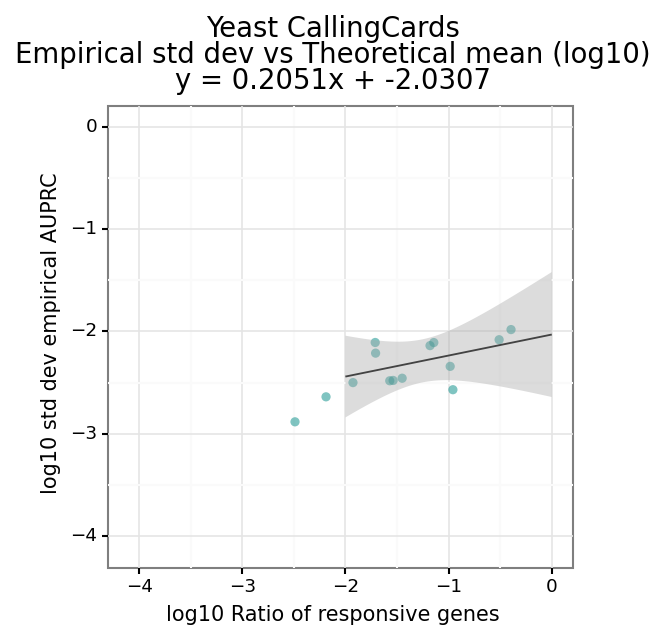

<ggplot: (2948167286564)>

In [7]:
locals().update(plot_dfs['CallingCards'])

ax = (
    ggplot()
    + geom_point(plot_df[plot_df['p-value'] < 0.001], aes(x='logratio', y='logstd'), color=COLORS['dark_green'], stroke=0, size=2.5, alpha=0.5)
    + geom_point(plot_df[plot_df['p-value'] >= 0.001], aes(x='logratio', y='logstd'), color=COLORS['red'], stroke=0, size=2.5, alpha=0.5)
    + geom_line(aes(x='x', y='y'), data=res_oos)
    + geom_ribbon(aes(x='x', ymin='ymin', ymax='ymax'), data=res_oos, fill=COLORS['grey'], alpha=0.4)
    + labs(x='log10 Ratio of responsive genes', y='log10 std dev empirical AUPRC', title='Yeast CallingCards\nEmpirical std dev vs Theoretical mean (log10)\ny = {:.4f}x + {:.4f}'.format(slope, y_int))
    + xlim(-4.1, 0)
    + ylim(-4.1, 0)
    + theme_bw()
    + theme(
        figure_size=(4,4), dpi=150,
        axis_text_x=element_text(color='#000000'),
        axis_text_y=element_text(color='#000000'),
        axis_title=element_text(size=10, lineheight=1.5))
)
display(ax)
ggsave(ax, "Final/Yeast_CC_emp_std_vs_chance.pdf", dpi=150, bbox_inches='tight')

In [8]:
locals().update(plot_dfs['ChIPexo'])

tabulate_results(plot_df, binding_baseline_dfs['ChIPexo'], yeast_sys2com_dict)

,TF,AUPRC,Random expectation,TF binding only,p-value,For SHAP analysis
0,YEL009C (GCN4),0.446782,0.309200,0.418918,1.910525e-12,TRUE
3,YHR178W (STB5),0.284424,0.096048,0.206455,1.411085e-21,TRUE
1,YLR256W (HAP1),0.239952,0.119695,0.173566,4.779737e-16,TRUE
8,YLR451W (LEU3),0.239169,0.026887,0.145734,1.807283e-43,TRUE
4,YBL103C (RTG3),0.233059,0.079527,0.088797,9.844352e-48,TRUE
2,YAL051W (OAF1),0.219119,0.102365,0.111328,2.403901e-28,TRUE
5,YJR060W (CBF1),0.207609,0.071914,0.181644,2.023507e-06,TRUE
9,YNL199C (GCR2),0.189107,0.019598,0.145091,1.433447e-44,TRUE
6,YOR344C (TYE7),0.176822,0.035471,0.118897,5.019528e-18,TRUE
10,YOL067C (RTG1),0.174343,0.019112,0.089588,2.735433e-25,TRUE


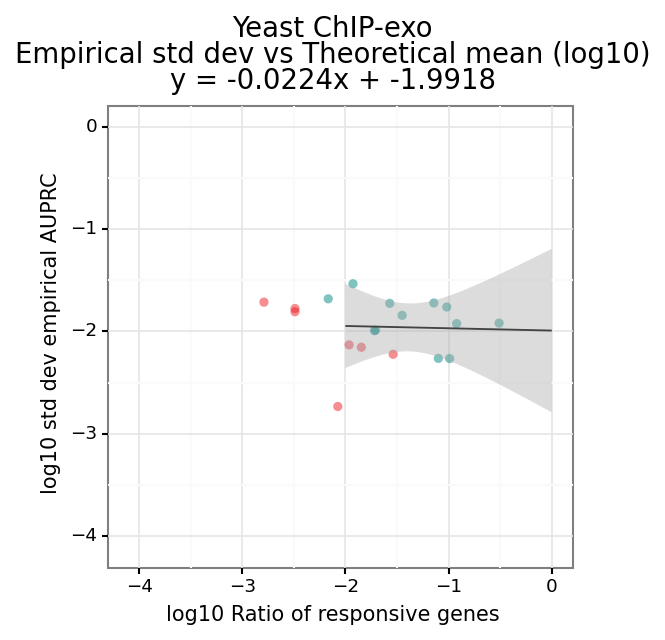

<ggplot: (2948167306602)>

In [9]:
locals().update(plot_dfs['ChIPexo'])

ax = (
    ggplot()
    + geom_point(plot_df[plot_df['p-value'] < 0.001], aes(x='logratio', y='logstd'), color=COLORS['dark_green'], stroke=0, size=2.5, alpha=0.5)
    + geom_point(plot_df[plot_df['p-value'] >= 0.001], aes(x='logratio', y='logstd'), color=COLORS['red'], stroke=0, size=2.5, alpha=0.5)
    + geom_line(aes(x='x', y='y'), data=res_oos)
    + geom_ribbon(aes(x='x', ymin='ymin', ymax='ymax'), data=res_oos, fill=COLORS['grey'], alpha=0.4)
    + labs(x='log10 Ratio of responsive genes', y='log10 std dev empirical AUPRC', title='Yeast ChIP-exo\nEmpirical std dev vs Theoretical mean (log10)\ny = {:.4f}x + {:.4f}'.format(slope, y_int))
    + xlim(-4.1, 0)
    + ylim(-4.1, 0)
    + theme_bw()
    + theme(
        figure_size=(4,4), dpi=150,
        axis_text_x=element_text(color='#000000'),
        axis_text_y=element_text(color='#000000'),
        axis_title=element_text(size=10, lineheight=1.5))
)
display(ax)
ggsave(ax, "Final/Yeast_ChIPexo_emp_std_vs_chance.pdf", dpi=150, bbox_inches='tight')

# Human

In [10]:
human_dict = {
    'permutations': {
        "H1": "../OUTPUT/H1_TGI_crosstf/permutations/",
        "K562": "../OUTPUT/K562_crosstf/permutations/",
        "HEK293": "../OUTPUT/HEK293_crosstf_updated/permutations/"
    },
    'experiments': {
        "H1": "../OUTPUT/H1_TGI_crosstf/all_feats/",
        "K562": "../OUTPUT/K562_crosstf/all_feats/",
        "HEK293": "../OUTPUT/HEK293_crosstf_updated/all_feats/"
    },
    'tf_names': {
        "H1": "../RESOURCES/TI_TFPert/TGI_RNASEQ_TFS.txt",
        "K562": "../RESOURCES/K562_TFPert/k562_cross_tfs.txt",
        "HEK293": "../RESOURCES/HEK293_TFPert/Human_HEK293_TFs.txt"
    },
    'binding_baseline': {
        "H1": "../OUTPUT/H1_TGI_crosstf/bindingonly/",
        "K562": "../OUTPUT/K562_crosstf/bindingonly/",
        "HEK293": "../OUTPUT/HEK293_crosstf_updated/bindingonly/"
    },
    "organism": {
        "H1": "human_h1",
        "K562": "human_k562",
        "HEK293": "human_hek"
    }
}
human_ensg_hgnc_dict_path = "../RESOURCES/Human/hgnc_ensembl.tbl"

In [11]:
human_ensg_hgnc_dict = {
    row['ENSEMBL']:row['HGNC']  \
    for _,row in pd.read_csv(human_ensg_hgnc_dict_path, sep="\t", usecols=[0, 1]
    ).iterrows()}

In [12]:
full_stats_dfs, summary_dfs, random_chance_dfs, binding_baseline_dfs, _, _ = process_results(human_dict)

Permutations:
### H1
	Number of runs: 35
	Number of TFs: 23
### K562
	Number of runs: 35
	Number of TFs: 42
### HEK293
	Number of runs: 5
	Number of TFs: 80


In [13]:
plot_dfs = regress_std_chance(full_stats_dfs)

############### H1 ###############
                 tf     auprc     ratio      mean       std  std_pred        p-value
0   ENSG00000172216  0.590324  0.364188  0.368724  0.018603  0.012267   2.994246e-73
1   ENSG00000111704  0.351693  0.206727  0.221974  0.008096  0.008318   3.934346e-55
2   ENSG00000118260  0.232771  0.180325  0.180704  0.004019  0.007574   3.105200e-12
3   ENSG00000105698  0.296212  0.179850  0.178811  0.005868  0.007560   1.101083e-54
4   ENSG00000177606  0.373792  0.162794  0.157440  0.012122  0.007061  1.666729e-206
5   ENSG00000140262  0.274360  0.136392  0.156557  0.005311  0.006253   1.834910e-79
6   ENSG00000175592  0.252818  0.078414  0.074479  0.006730  0.004278   0.000000e+00
7   ENSG00000136997  0.176955  0.076460  0.079875  0.004394  0.004204  2.839525e-118
8   ENSG00000100811  0.138536  0.058824  0.055585  0.002077  0.003512  1.223329e-123
9   ENSG00000158773  0.125443  0.044144  0.041675  0.002089  0.002884  9.222436e-186
10  ENSG00000177045  0.084295 

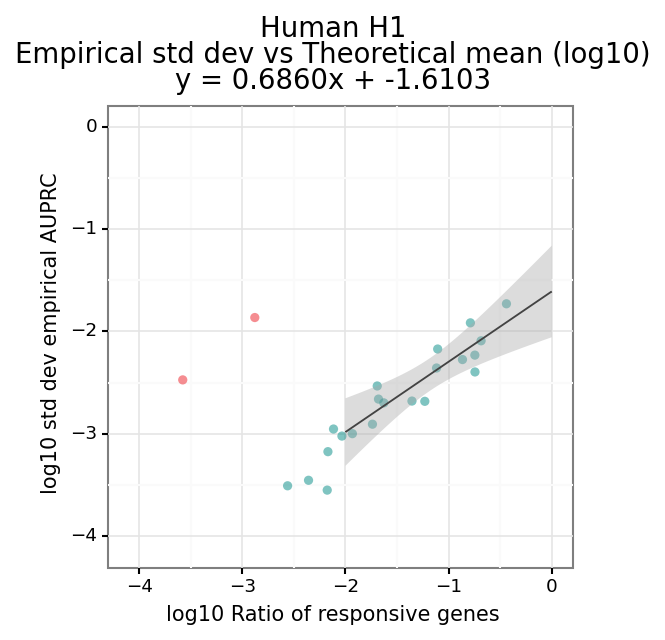

<ggplot: (-9223369088676346224)>

In [14]:
locals().update(plot_dfs['H1'])

ax = (
    ggplot()
    + geom_point(plot_df[plot_df['p-value'] <= 0.001], aes(x='logratio', y='logstd'), color=COLORS['dark_green'], stroke=0, size=2.5, alpha=0.5)
    + geom_point(plot_df[plot_df['p-value'] > 0.001], aes(x='logratio', y='logstd'), color=COLORS['red'], stroke=0, size=2.5, alpha=0.5)
    + geom_line(aes(x='x', y='y'), data=res_oos)
    + geom_ribbon(aes(x='x', ymin='ymin', ymax='ymax'), data=res_oos, fill=COLORS['grey'], alpha=0.4)
    + labs(x='log10 Ratio of responsive genes', y='log10 std dev empirical AUPRC', title='Human H1\nEmpirical std dev vs Theoretical mean (log10)\ny = {:.4f}x + {:.4f}'.format(slope, y_int))
    + xlim(-4.1, 0)
    + ylim(-4.1, 0)
    + theme_bw()
    + theme(
        figure_size=(4,4), dpi=150,
        axis_text_x=element_text(color='#000000'),
        axis_text_y=element_text(color='#000000'),
        axis_title=element_text(size=10, lineheight=1.5))
)
display(ax)
ggsave(ax, "Final/Human_H1_emp_std_vs_chance.pdf", dpi=150, bbox_inches='tight')

In [15]:
locals().update(plot_dfs['H1'])

tabulate_results(plot_df, binding_baseline_dfs['H1'], human_ensg_hgnc_dict)

,TF,AUPRC,Random expectation,TF binding only,p-value,For SHAP analysis
0,ENSG00000172216 (CEBPB),0.590324,0.364188,0.392335,2.994246e-73,TRUE
4,ENSG00000177606 (JUN),0.373792,0.162794,0.171404,1.666729e-206,TRUE
1,ENSG00000111704 (NANOG),0.351693,0.206727,0.221505,3.934346e-55,TRUE
3,ENSG00000105698 (USF2),0.296212,0.179850,0.193345,1.101083e-54,TRUE
5,ENSG00000140262 (TCF12),0.274360,0.136392,0.158021,1.834910e-79,TRUE
6,ENSG00000175592 (FOSL1),0.252818,0.078414,0.079650,0.000000e+00,TRUE
2,ENSG00000118260 (CREB1),0.232771,0.180325,0.189654,3.105200e-12,TRUE
7,ENSG00000136997 (MYC),0.176955,0.076460,0.089083,2.839525e-118,TRUE
8,ENSG00000100811 (YY1),0.138536,0.058824,0.064849,1.223329e-123,TRUE
9,ENSG00000158773 (USF1),0.125443,0.044144,0.054517,9.222436e-186,TRUE


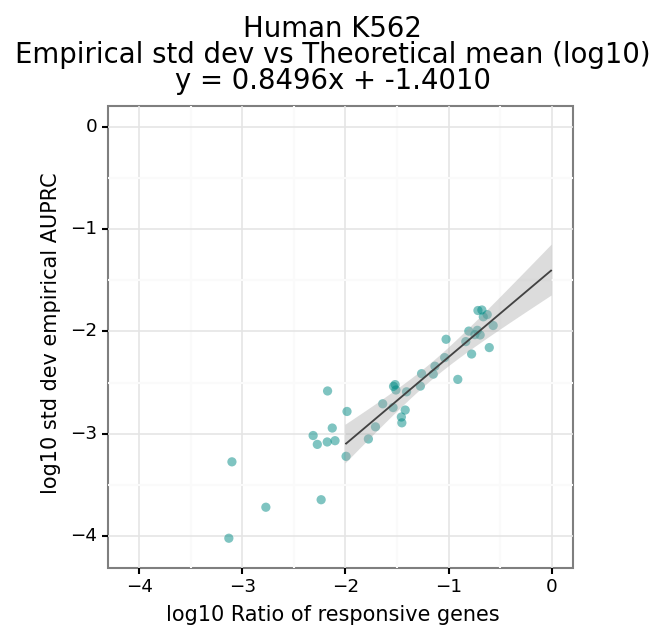

<ggplot: (2948167300016)>

In [16]:
locals().update(plot_dfs['K562'])

ax = (
    ggplot()
    + geom_point(plot_df, aes(x='logratio', y='logstd'), color=COLORS['dark_green'], stroke=0, size=2.5, alpha=0.5)
    + geom_line(aes(x='x', y='y'), data=res_oos)
    + geom_ribbon(aes(x='x', ymin='ymin', ymax='ymax'), data=res_oos, fill=COLORS['grey'], alpha=0.4)
    + labs(x='log10 Ratio of responsive genes', y='log10 std dev empirical AUPRC', title='Human K562\nEmpirical std dev vs Theoretical mean (log10)\ny = {:.4f}x + {:.4f}'.format(slope, y_int))
    + xlim(-4.1, 0)
    + ylim(-4.1, 0)
    + theme_bw()
    + theme(
        figure_size=(4,4), dpi=150,
        axis_text_x=element_text(color='#000000'),
        axis_text_y=element_text(color='#000000'),
        axis_title=element_text(size=10, lineheight=1.5))
)
display(ax)
ggsave(ax, "Final/Human_K562_emp_std_vs_chance.pdf", dpi=150, bbox_inches='tight')

In [17]:
locals().update(plot_dfs['K562'])

tabulate_results(plot_df, binding_baseline_dfs['K562'], human_ensg_hgnc_dict)

,TF,AUPRC,Random expectation,TF binding only,p-value,For SHAP analysis
4,ENSG00000113658 (SMAD5),0.629021,0.210318,0.314210,2.297450e-290,TRUE
6,ENSG00000143390 (RFX5),0.628307,0.192734,0.218206,0.000000e+00,TRUE
0,ENSG00000105698 (USF2),0.611809,0.270726,0.319458,1.028065e-131,TRUE
2,ENSG00000074219 (TEAD2),0.608637,0.237037,0.253335,7.664930e-277,TRUE
5,ENSG00000177045 (SIX5),0.604165,0.202397,0.224833,0.000000e+00,TRUE
3,ENSG00000131931 (THAP1),0.579473,0.217130,0.267409,2.895313e-225,TRUE
7,ENSG00000185591 (SP1),0.575355,0.190305,0.261953,5.848301e-293,TRUE
1,ENSG00000187098 (MITF),0.569573,0.248178,0.301366,1.261264e-140,TRUE
9,ENSG00000197905 (TEAD4),0.561362,0.167230,0.221266,0.000000e+00,TRUE
8,ENSG00000198176 (TFDP1),0.552608,0.179850,0.249474,0.000000e+00,TRUE


############### HEK293 ###############
                 tf     auprc     ratio      mean       std  std_pred       p-value
0   ENSG00000172006  0.405905  0.245433  0.260034  0.000875  0.012295  9.038948e-33
1   ENSG00000185591  0.446669  0.231549  0.318275  0.005174  0.011561  5.880937e-29
2   ENSG00000179388  0.446806  0.191426  0.260705  0.009546  0.009456  1.551202e-86
3   ENSG00000105866  0.380092  0.184035  0.230505  0.002861  0.009070  2.096848e-61
4   ENSG00000167182  0.354663  0.182504  0.221674  0.004307  0.008991  8.259653e-50
..              ...       ...       ...       ...       ...       ...           ...
75  ENSG00000188295  0.118763  0.026080  0.023536  0.000747  0.001151  0.000000e+00
76  ENSG00000085644  0.154119  0.025657  0.024900  0.001209  0.001131  0.000000e+00
77  ENSG00000173275  0.101557  0.016102  0.017046  0.000279  0.000692  0.000000e+00
78  ENSG00000147124  0.117969  0.013937  0.016170  0.000530  0.000594  0.000000e+00
79  ENSG00000182986  0.052350  0.0062

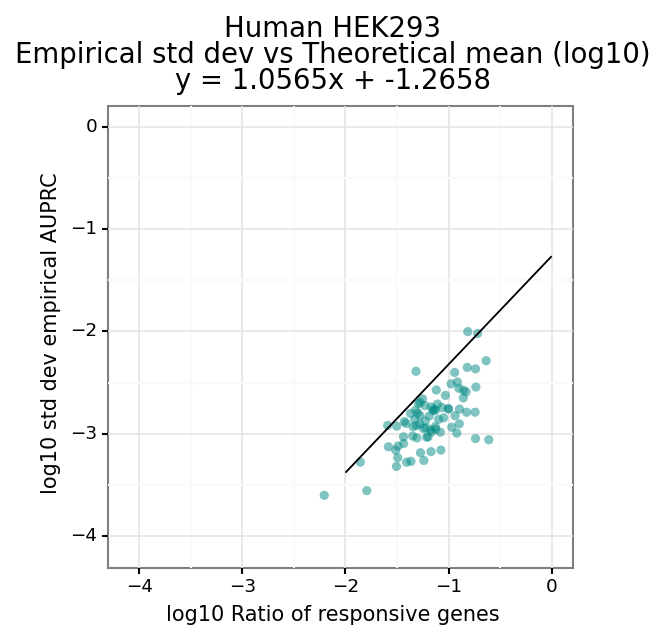

<ggplot: (-9223369088676424118)>

In [18]:
# HEK293 regress over max values in bins (accounting for fewer permutations)
hek_reg_binned = regress_std_chance_binned_(full_stats_dfs['HEK293'], num_bins=5, dataset='HEK293')
locals().update(hek_reg_binned)

ax = (
    ggplot()
    + geom_point(plot_df, aes(x='logratio', y='logstd'), color=COLORS['dark_green'], stroke=0, size=2.5, alpha=0.5)
    + geom_line(aes(x='x', y='y'), data=res_oos)
    + labs(x='log10 Ratio of responsive genes', y='log10 std dev empirical AUPRC', title='Human HEK293\nEmpirical std dev vs Theoretical mean (log10)\ny = {:.4f}x + {:.4f}'.format(slope, y_int))
    + xlim(-4.1, 0)
    + ylim(-4.1, 0)
    + theme_bw()
    + theme(
        figure_size=(4,4), dpi=150,
        axis_text_x=element_text(color='#000000'),
        axis_text_y=element_text(color='#000000'),
        axis_title=element_text(size=10, lineheight=1.5))
)
display(ax)
ggsave(ax, "Final/Human_HEK293_emp_std_vs_chance_corrected.pdf", dpi=150, bbox_inches='tight')

In [20]:
locals().update(hek_reg_binned)

tabulate_results(plot_df, binding_baseline_dfs['HEK293'], human_ensg_hgnc_dict)

,TF,AUPRC,Random expectation,TF binding only,p-value,For SHAP analysis
2,ENSG00000179388 (EGR3),0.446806,0.191426,0.300566,1.551202e-86,TRUE
1,ENSG00000185591 (SP1),0.446669,0.231549,0.337586,5.880937e-29,TRUE
7,ENSG00000174332 (GLIS1),0.415520,0.153521,0.238727,6.104424e-160,TRUE
0,ENSG00000172006 (ZNF554),0.405905,0.245433,0.292960,9.038948e-33,TRUE
5,ENSG00000118922 (KLF12),0.400510,0.182452,0.207815,1.808899e-121,TRUE
...,...,...,...,...,...,...
65,ENSG00000178187 (ZNF454),0.109777,0.039172,0.042941,0.000000e+00,TRUE
67,ENSG00000197372 (ZNF675),0.109714,0.037219,0.039553,0.000000e+00,TRUE
77,ENSG00000173275 (ZNF449),0.101557,0.016102,0.017144,0.000000e+00,TRUE
72,ENSG00000181444 (ZNF467),0.077792,0.031412,0.037545,9.925088e-185,TRUE
